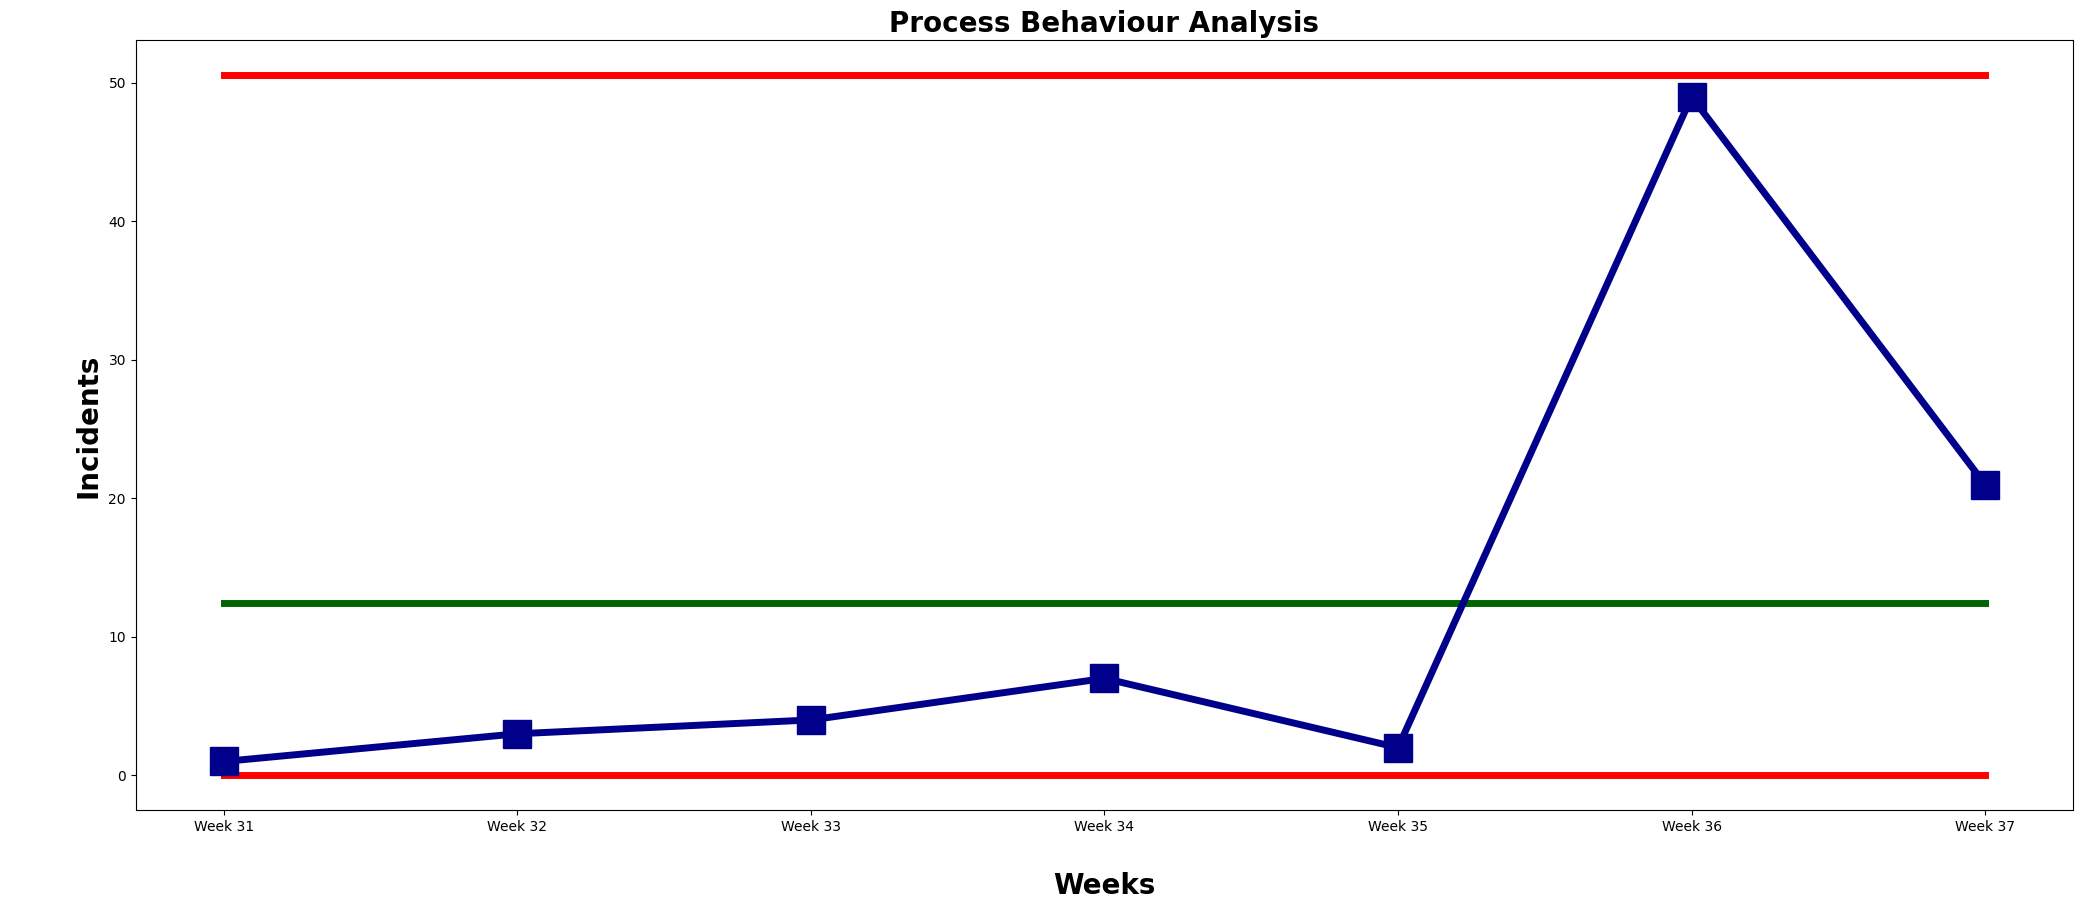

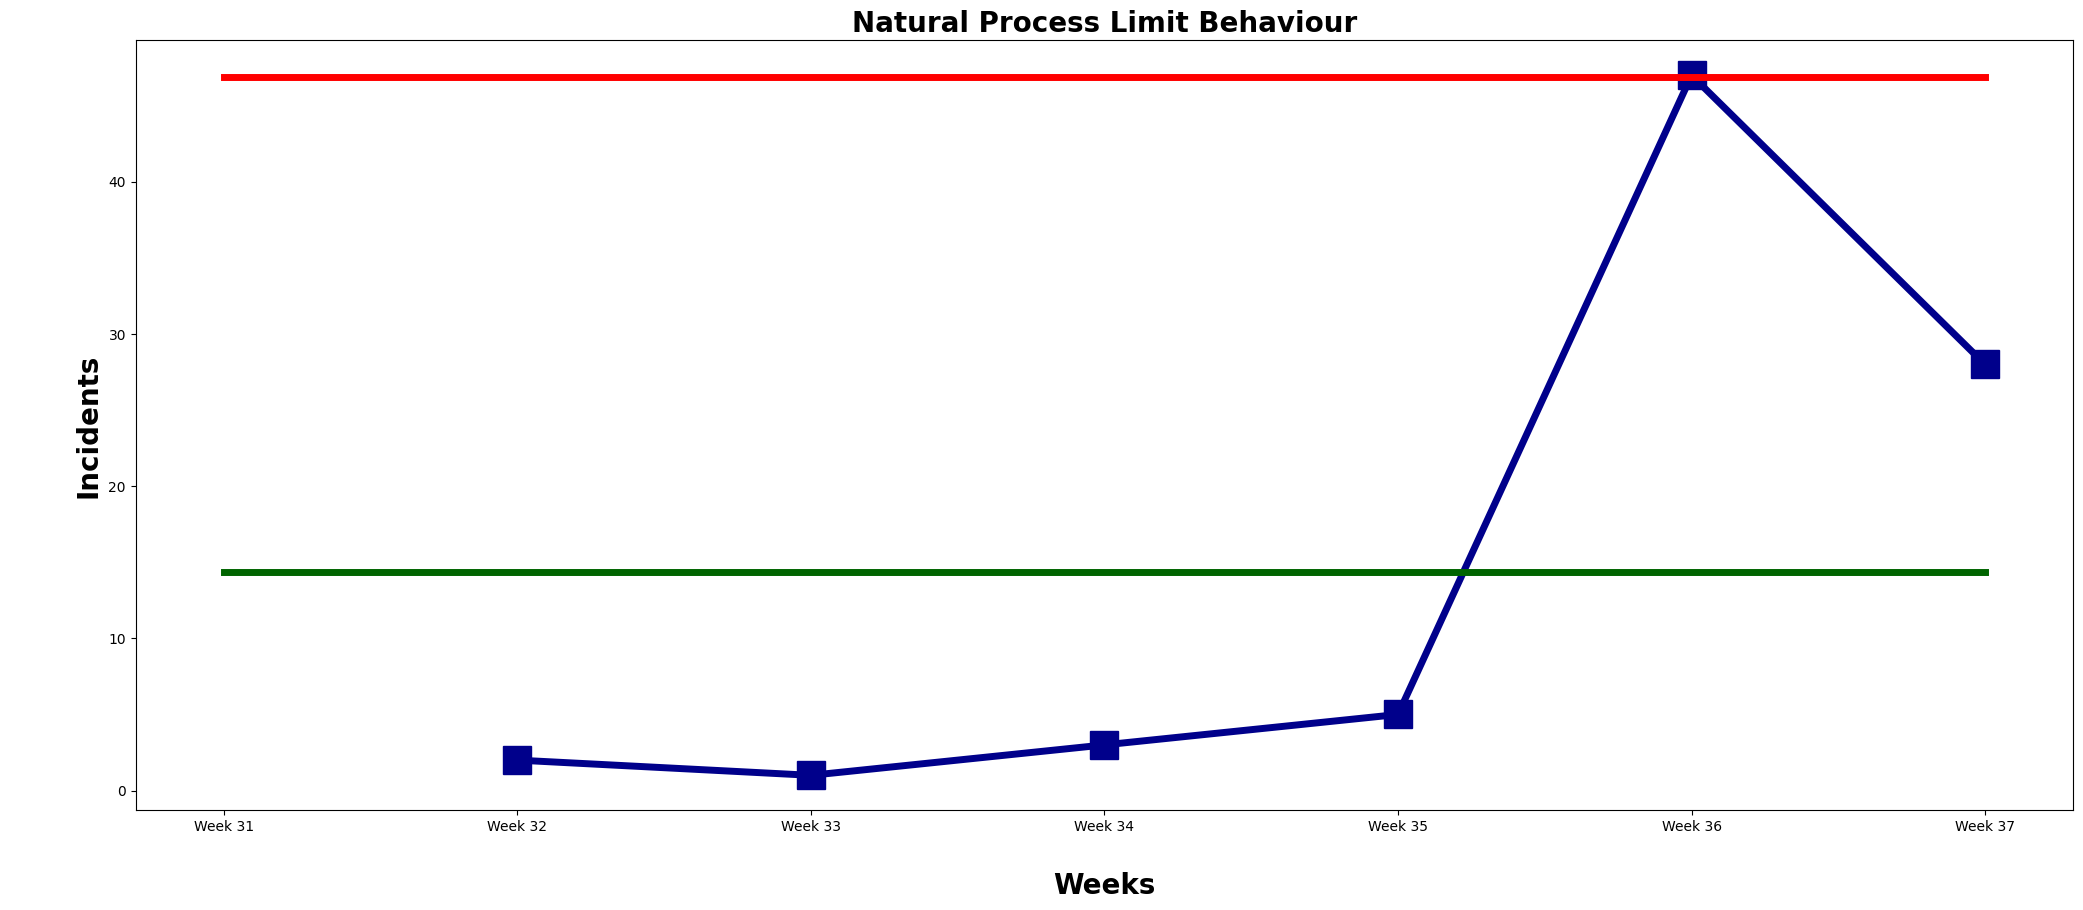

In [7]:
# PBA - ServiceNow Incident Ticket Management #

import pandas as pd

# Load the data into a DataFrame
df = pd.read_excel('ServiceNow Incident Sample Data.xlsx')

# Display the DataFrame
df.head()

df = df.sort_values('Created', ascending=True)

# Extract the date part from the "Created" column
df['Date'] = pd.to_datetime(df['Created']).dt.date

# Extract the week number from the "Date" column
df['Week'] = df['Date'].apply(lambda x: x.isocalendar().week)

pivot_table = df.pivot_table(index='Week', values='Date', aggfunc='count')

pivot_table = pivot_table.rename(columns={'Date': 'Count'})
# Calculate the average value of the "Count" column
average_count = pivot_table['Count'].mean()

# Create a new column "Average" and fill it with the average value
pivot_table['Average'] = average_count

# Round off the values in the "Average" column to 2 decimal places
pivot_table['Average'] = pivot_table['Average'].round(2)

# Calculate the moving range of the "Count" column
pivot_table['mRange'] = pivot_table['Count'].diff().abs()

# Calculate the moving range average of the "mRange" column
mrange_average = pivot_table['mRange'].mean()

# Create a new column "mRange_Average" and fill it with the average value
pivot_table['mRange_Average'] = mrange_average

# Round off the values in the "mRange_Average" column to 2 decimal places
pivot_table['mRange_Average'] = pivot_table['mRange_Average'].round(2)

# Calculate "UNPL" using the given formula
pivot_table['UNPL'] = pivot_table['Average'] + (2.66 * pivot_table['mRange_Average'])

# Round off the values in the "UNPL" column to 2 decimal places
pivot_table['UNPL'] = pivot_table['UNPL'].round(2)

# Calculate "LNPL" using the given formula
pivot_table['LNPL'] = pivot_table['Average'] - (2.66 * pivot_table['mRange_Average'])

# Round off the values in the "LNPL" column to 2 decimal places
pivot_table['LNPL'] = pivot_table['LNPL'].round(2)
pivot_table["LNPL"] = pivot_table["LNPL"].apply(lambda x: max(x,0))

# Calculating the Moving Range Natural Process Limit
pivot_table["mRange_NPL"] = pivot_table["mRange_Average"] * 3.27

# Reset the index to make 'Week' a column again
pivot_table = pivot_table.reset_index()

#Adding "Week" as a prefix to all the values in the column "Week"
pivot_table['Week'] = 'Week ' + pivot_table['Week'].astype(str)

pivot_table

############################################################################
# Create a line chart - PRocess BEHAVIOUR ANALYTICS

#importing matplot libbrary
import matplotlib.pyplot as plt

# Plotting the line chart
plt.figure(figsize=(25, 10))

#Events Average
plt.plot(pivot_table['Week'], pivot_table['Average'], label="Average", color = "darkgreen", linewidth = 5)

#Upper Natural Process Limit
plt.plot(pivot_table['Week'], pivot_table['UNPL'], label='UNPL', color = "red", linewidth = 5)

#Lower Natural Process Limit
plt.plot(pivot_table['Week'], pivot_table['LNPL'], label='LNPL', color = "red", linewidth = 5)

#Incident
plt.plot(pivot_table.index, pivot_table['Count'], label='Count',  color = "darkblue", marker = "s", markersize = 20, linewidth = 5)

# Adding labels and title
plt.xlabel('\nWeeks', fontsize=20, fontweight="bold")
plt.ylabel('\n\nIncidents', fontsize=20, fontweight="bold")
plt.title('Process Behaviour Analysis', fontsize=20, fontweight="bold")
plt.grid(False)
plt.show()

#############################################################################################################################################################################

# Create a line chart - NATURAL PROCESS BEHIOUR

# Plotting the line chart
plt.figure(figsize=(25, 10))

#Events Moving Range
plt.plot(pivot_table['Week'], pivot_table['mRange'], label="mRange", color = "darkblue", linewidth = 5, marker = "s", markersize = 20)

#Events Moving Range Average
plt.plot(pivot_table['Week'], pivot_table['mRange_Average'], label='mRange_Average', color = "darkgreen", linewidth = 5)

#Natural Process Limit
plt.plot(pivot_table['Week'], pivot_table['mRange_NPL'], label='mRange_NPL', color = "red", linewidth = 5)

# Adding labels and title
plt.xlabel('\nWeeks', fontsize=20, fontweight="bold")
plt.ylabel('\n\nIncidents', fontsize=20, fontweight="bold")
plt.title('Natural Process Limit Behaviour', fontsize=20, fontweight="bold")
plt.grid(False)
plt.show()

###########################################################################


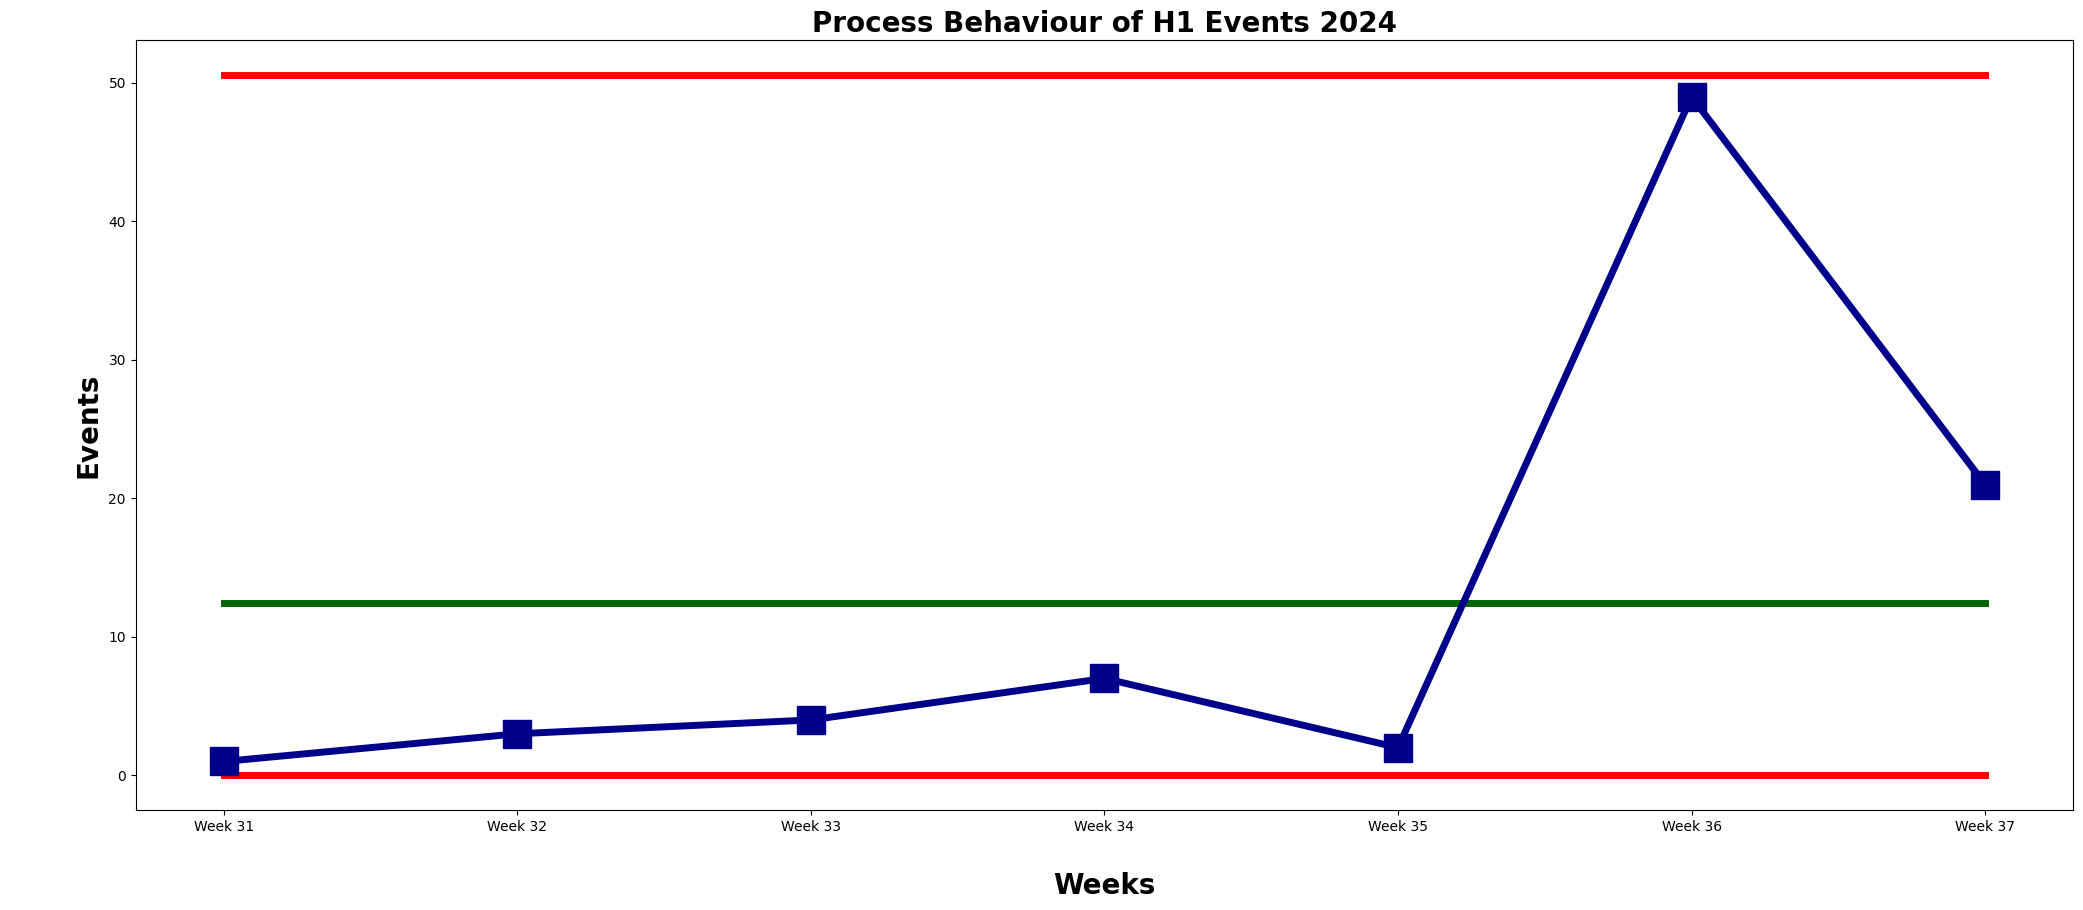

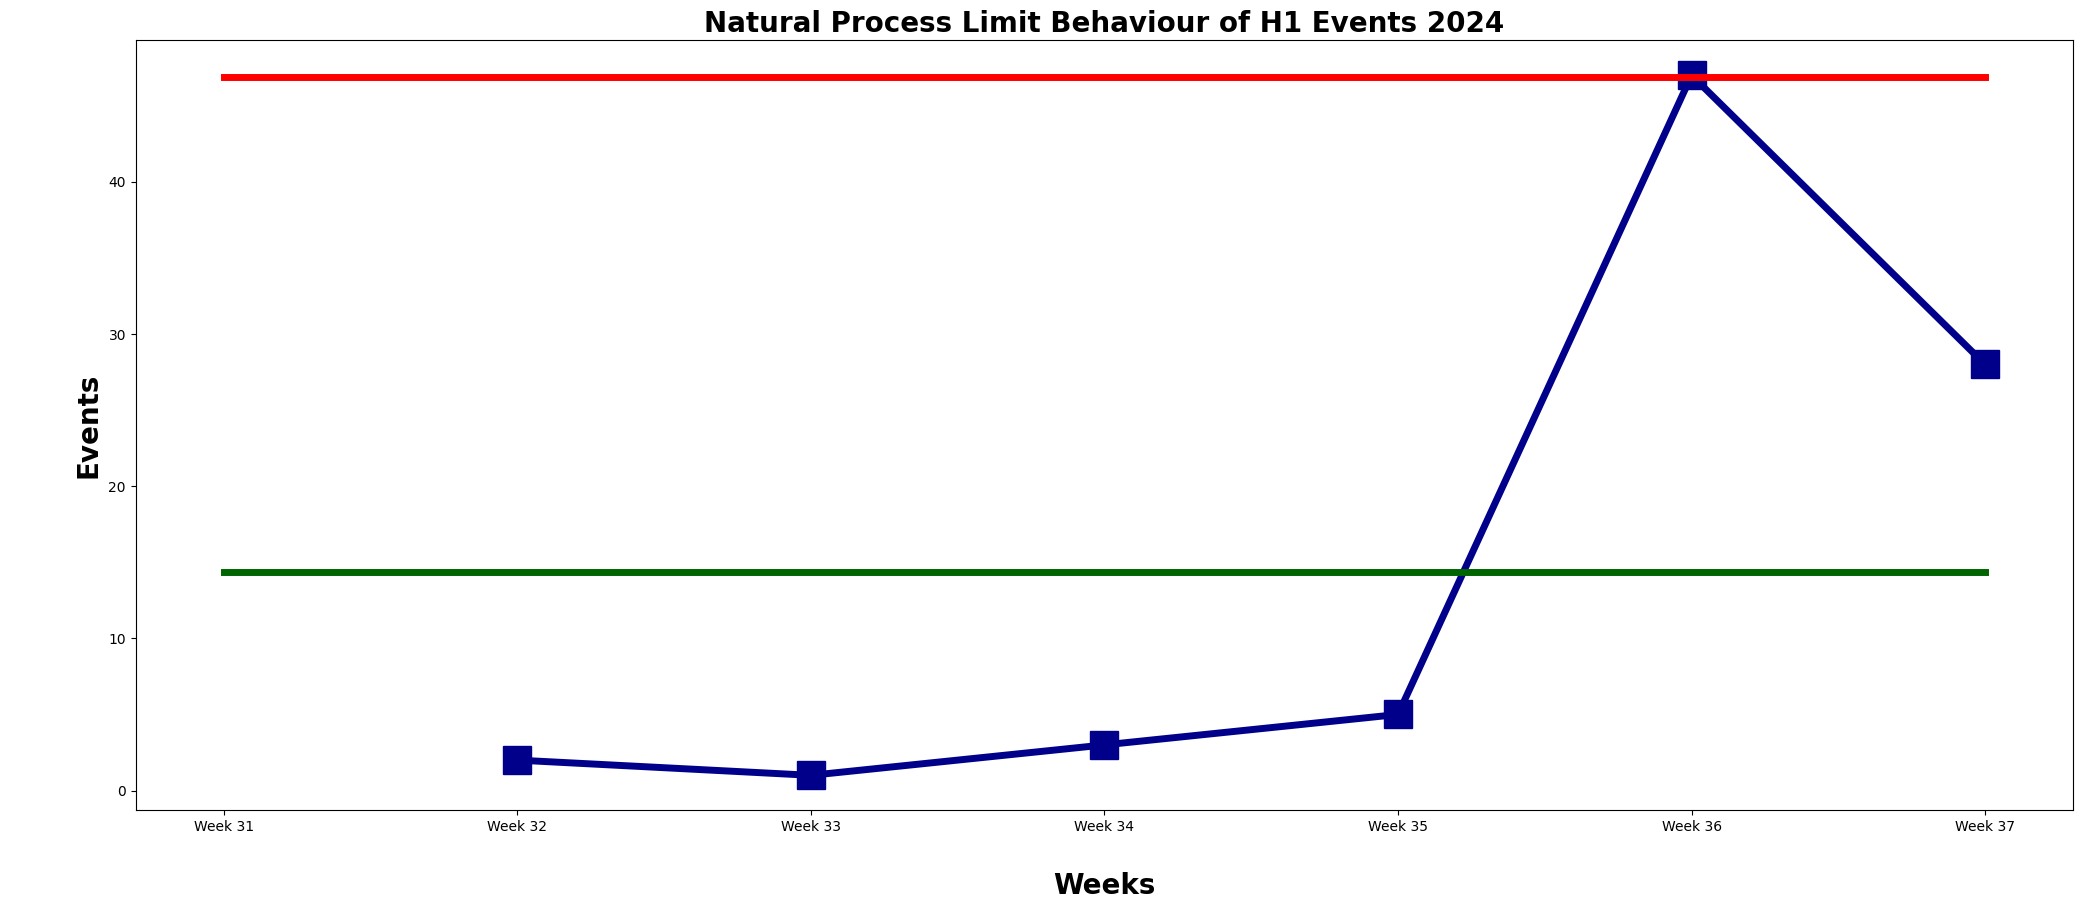